In [1]:
from model.model_initialization import * 
initialize_model(1000, 10, 0.01, 0.02)

{'cfmm_type': '',
 'initial_values': {'token_list': ['R1', 'R2'],
  'R': [1000, 1500000],
  'P': [2, 0.6666666666666666],
  'fee_assets': 0.01,
  'fee_HDX': 0.02},
 'agent_d': {'Trader': {'HDX': 1000000, 'R1': 1000000, 'R2': 1000000},
  'LP1': {'omniR1': 10}},
 'action_ls': [('trade', 1000)],
 'prob_dict': {'trade': {'sell_r2_for_r1': 0.5, 'sell_r1_for_r2': 0.5}},
 'action_dict': {'sell_r2_for_r1': {'token_buy': 'R1',
   'token_sell': 'R2',
   'amount_sell': 10,
   'action_id': 'Trade',
   'agent_id': 'Trader'},
  'sell_r1_for_r2': {'token_sell': 'R1',
   'token_buy': 'R2',
   'amount_sell': 10,
   'action_id': 'Trade',
   'agent_id': 'Trader'}}}

In [2]:
import pandas as pd

from IPython.core.debugger import Pdb
ipdb = Pdb()

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *
from model.model_initialization import * 

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# set variables & parameters

fee_level_assets = 0.04
fee_level_hdx = 0.07
# uniform_data = np.random.rand(10, 12)
#trade_volume = {'10': 0.5, '20': 0.6}
#liquidity = {'1000': 0.5, '2000': 0.6}
#trade_volume = (50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)
#liquidity = (100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000)
trade_volume = (50, 100)
liquidity = (100000, 200000)

#create matrix for comparison
m=len(trade_volume)
n=len(liquidity)
matrix = np.ndarray(shape = (m,n), dtype = int)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index


for i in range(len(liquidity)):
    for j in range(len(trade_volume)):
        # initialize model with starting conditions
        config_params = initialize_model(liquidity[i], trade_volume[j], fee_level_assets, fee_level_hdx)
        
        #run model
        config_dict, state = init_utils.get_configuration(config_params)

        pd.options.mode.chained_assignment = None  # default='warn'
        pd.options.display.float_format = '{:.2f}'.format
        
        run.config(config_dict, state)
        events = run.run()
        
        rdf, agent_df = processing.postprocessing(events)
        
        # calculate profitability metric; change in pool values
        
        if (i == 0) & (j == 0):
            sim_nr = 0
        elif (i == 0) & (j == 1):
            sim_nr = 1
        elif (i == 1) & (j == 0):
            sim_nr = 2
        elif (i == 1) & (j == 1):
            sim_nr = 3
            
        print(sim_nr)
        
        #for first asset: R-0
        rdf1 = rdf[rdf["simulation"] == sim_nr]
        rdf2 = rdf1[rdf1["timestep"] == 1000]
        r0_1 = rdf2['R-0'].iloc[0]
        
        rdf1 = rdf[rdf["simulation"] == sim_nr]
        rdf2 = rdf1[rdf1["timestep"] == 1]
        r0_0 = rdf2['R-0'].iloc[0]
        
        profit_sim0_r0 = r0_1 - r0_0
        
        #for second asset: R-1
        rdf1 = rdf[rdf["simulation"] == sim_nr]
        rdf2 = rdf1[rdf1["timestep"] == 1000]
        r1_1 = rdf2['R-1'].iloc[0]
        
        rdf1 = rdf[rdf["simulation"] == sim_nr]
        rdf2 = rdf1[rdf1["timestep"] == 1]
        r1_0 = rdf2['R-1'].iloc[0]
        
        profit_sim0_r1 = r1_1 - r1_0
        
        #total profit
        
        profit_sim0 = profit_sim0_r1 + profit_sim0_r0
        
        
        # fill in matrix with calculation results at specific place
        #matrix[j][i] = np.random.randint(1, 100 + 1)
        #matrix[j][i] = trade_volume[i]*liquidity[j]
        matrix[j][i] = profit_sim0





#print(agent_df.tail(20))




                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.35s
0

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 2
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0, 1]
SubsetIDs: [0, 0]
Ns       : [0, 0]
ExpIDs   : [0, 0]
Execution Mode: parallelized
Total execution time: 0.82s

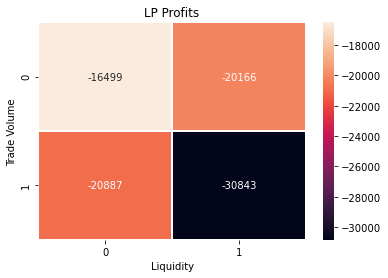

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix, linewidth=0.5, annot=True, fmt="d")
ax.set_title("LP Profits")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Liquidity')
ax.set_ylabel('Trade Volume')
plt.show()


var_list = ['R', 'Q', 'A', 'D']
plot_vars(rdf, var_list)

## Fee Analysis

In [4]:
rdf

,R-0,R-1,Q-0,Q-1,S-0,S-1,A-0,A-1,B-0,B-1,...,token_list-0,token_list-1,fee_assets,fee_HDX,n,simulation,subset,run,substep,timestep
3,100050.00,1499866.16,199900.05,1000096.67,100000,1500000,0,0,99950,1500000,...,R1,R2,0.04,0.07,2,0,0,1,3,1
6,100035.11,1499916.16,199932.30,1000063.33,100000,1500000,0,0,99950,1500000,...,R1,R2,0.04,0.07,2,0,0,1,3,2
9,100020.22,1499966.16,199964.54,1000030.00,100000,1500000,0,0,99950,1500000,...,R1,R2,0.04,0.07,2,0,0,1,3,3
12,100005.33,1500016.16,199996.78,999996.66,100000,1500000,0,0,99950,1500000,...,R1,R2,0.04,0.07,2,0,0,1,3,4
15,100055.33,1499882.33,199896.84,1000093.33,100000,1500000,0,0,99950,1500000,...,R1,R2,0.04,0.07,2,0,0,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11991,234267.45,1434768.09,343795.21,1052201.69,200000,1500000,0,0,199900,1500000,...,R1,R2,0.04,0.07,2,3,0,1,3,996
11994,234222.84,1434868.09,343866.14,1052128.36,200000,1500000,0,0,199900,1500000,...,R1,R2,0.04,0.07,2,3,0,1,3,997
11997,234178.26,1434968.09,343937.05,1052055.04,200000,1500000,0,0,199900,1500000,...,R1,R2,0.04,0.07,2,3,0,1,3,998
12000,234278.26,1434789.33,343790.25,1052197.03,200000,1500000,0,0,199900,1500000,...,R1,R2,0.04,0.07,2,3,0,1,3,999


In [5]:
print(rdf.columns)

Index(['R-0', 'R-1', 'Q-0', 'Q-1', 'S-0', 'S-1', 'A-0', 'A-1', 'B-0', 'B-1',
       'D', 'T', 'H', 'token_list-0', 'token_list-1', 'fee_assets', 'fee_HDX',
       'n', 'simulation', 'subset', 'run', 'substep', 'timestep'],
      dtype='object')


In [6]:
print(rdf.keys)

<bound method NDFrame.keys of             R-0        R-1       Q-0        Q-1     S-0      S-1  A-0  A-1  \
3     100050.00 1499866.16 199900.05 1000096.67  100000  1500000    0    0   
6     100035.11 1499916.16 199932.30 1000063.33  100000  1500000    0    0   
9     100020.22 1499966.16 199964.54 1000030.00  100000  1500000    0    0   
12    100005.33 1500016.16 199996.78  999996.66  100000  1500000    0    0   
15    100055.33 1499882.33 199896.84 1000093.33  100000  1500000    0    0   
...         ...        ...       ...        ...     ...      ...  ...  ...   
11991 234267.45 1434768.09 343795.21 1052201.69  200000  1500000    0    0   
11994 234222.84 1434868.09 343866.14 1052128.36  200000  1500000    0    0   
11997 234178.26 1434968.09 343937.05 1052055.04  200000  1500000    0    0   
12000 234278.26 1434789.33 343790.25 1052197.03  200000  1500000    0    0   
12003 234378.26 1434610.78 343643.56 1052338.90  200000  1500000    0    0   

          B-0      B-1  ...  toke

In [7]:
agent_df

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,r-0,r-1,p-0,p-1
6,0,0,1,3,1,Trader,1000000.00,0,0,999950.00,1000133.84,0.00,0
7,0,0,1,3,1,LP1,0.00,50,0,0.00,0.00,2.00,0
12,0,0,1,3,2,Trader,1000000.00,0,0,999964.89,1000083.84,0.00,0
13,0,0,1,3,2,LP1,0.00,50,0,0.00,0.00,2.00,0
18,0,0,1,3,3,Trader,1000000.00,0,0,999979.78,1000033.84,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,3,0,1,3,998,LP1,0.00,100,0,0.00,0.00,2.00,0
24000,3,0,1,3,999,Trader,1000000.00,0,0,965721.74,1065210.67,0.00,0
24001,3,0,1,3,999,LP1,0.00,100,0,0.00,0.00,2.00,0
24006,3,0,1,3,1000,Trader,1000000.00,0,0,965621.74,1065389.22,0.00,0


In [8]:
agent_df.query('agent_label=="LP1"')

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,r-0,r-1,p-0,p-1
7,0,0,1,3,1,LP1,0.00,50,0,0.00,0.00,2.00,0
13,0,0,1,3,2,LP1,0.00,50,0,0.00,0.00,2.00,0
19,0,0,1,3,3,LP1,0.00,50,0,0.00,0.00,2.00,0
25,0,0,1,3,4,LP1,0.00,50,0,0.00,0.00,2.00,0
31,0,0,1,3,5,LP1,0.00,50,0,0.00,0.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23983,3,0,1,3,996,LP1,0.00,100,0,0.00,0.00,2.00,0
23989,3,0,1,3,997,LP1,0.00,100,0,0.00,0.00,2.00,0
23995,3,0,1,3,998,LP1,0.00,100,0,0.00,0.00,2.00,0
24001,3,0,1,3,999,LP1,0.00,100,0,0.00,0.00,2.00,0


## How to metric

In [9]:
rdf.loc[(rdf['simulation'] == 0) & (rdf['timestep'] == 1000)]['R-1']

3000   1466016.73
Name: R-1, dtype: float64

In [10]:
#import pandas as pd
#rdf.get_value('simulation' == 0 )]
rdf1 = rdf[rdf["simulation"] == 0]
rdf2 = rdf1[rdf1["timestep"] == 1000]
x_0 = rdf2['R-0'].iloc[0]
x_0


117399.73346950552

In [11]:
rdf.loc[(rdf['simulation'] == 1) & (rdf['timestep'] == 1000)]['R-1']

6001   1446979.03
Name: R-1, dtype: float64

In [12]:
rdf.loc[(rdf['simulation'] == 2) & (rdf['timestep'] == 1000)]['R-1']

9002   1461729.47
Name: R-1, dtype: float64

In [13]:
rdf.loc[(rdf['simulation'] == 3) & (rdf['timestep'] == 1000)]['R-1']

12003   1434610.78
Name: R-1, dtype: float64

In [14]:
rdf.loc[(rdf['simulation'] == 0) & (rdf['timestep'] == 1)]['R-1']

3   1499866.16
Name: R-1, dtype: float64

In [15]:
rdf.loc[(rdf['simulation'] == 1) & (rdf['timestep'] == 1)]['R-1']

3004   1499732.48
Name: R-1, dtype: float64

In [16]:
rdf.loc[(rdf['simulation'] == 2) & (rdf['timestep'] == 1)]['R-1']

6005   1499866.13
Name: R-1, dtype: float64

In [17]:
rdf.loc[(rdf['simulation'] == 3) & (rdf['timestep'] == 1)]['R-1']

9006   1499732.34
Name: R-1, dtype: float64

### Calculate change in pool value

#### R-0

In [18]:
rdf1 = rdf[rdf["simulation"] == 0]
rdf2 = rdf1[rdf1["timestep"] == 1000]
r0_1 = rdf2['R-0'].iloc[0]
r0_1

117399.73346950552

In [19]:
rdf1 = rdf[rdf["simulation"] == 0]
rdf2 = rdf1[rdf1["timestep"] == 1]
r0_0 = rdf2['R-0'].iloc[0]
r0_0

100050.0

In [20]:
profit_sim0_r0 = r0_1 - r0_0
profit_sim0_r0

17349.733469505518

#### R-1

In [21]:
rdf1 = rdf[rdf["simulation"] == 0]
rdf2 = rdf1[rdf1["timestep"] == 1000]
r1_1 = rdf2['R-1'].iloc[0]
r1_1

1466016.7310875203

In [22]:
rdf1 = rdf[rdf["simulation"] == 0]
rdf2 = rdf1[rdf1["timestep"] == 1]
r1_0 = rdf2['R-1'].iloc[0]
r1_0

1499866.1593674952

In [23]:
profit_sim0_r1 = r1_1 - r1_0
profit_sim0_r1

-33849.42827997496

#### Total pool value

In [24]:
profit_sim0_r1 + profit_sim0_r0

-16499.694810469446

## How to heatmap

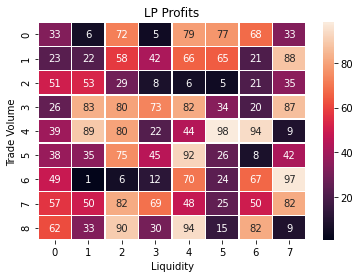

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# set variables & parameters

fee_level = 0.03
# uniform_data = np.random.rand(10, 12)
#trade_volume = {'10': 0.5, '20': 0.6}
#liquidity = {'1000': 0.5, '2000': 0.6}
trade_volume = (50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)
liquidity = (100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000)

#create matrix for comparison
m=len(trade_volume)
n=len(liquidity)
matrix = np.ndarray(shape = (m,n), dtype = int)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index

# fill in matrix with calculation results
for i in range(len(liquidity)):
    for j in range(len(trade_volume)):
        matrix[j][i] = np.random.randint(1, 100 + 1)




#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix, linewidth=0.5, annot=True, fmt="d")
ax.set_title("LP Profits")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Liquidity')
ax.set_ylabel('Trade Volume')
plt.show()

In [26]:
matrix

array([[33,  6, 72,  5, 79, 77, 68, 33],
       [23, 22, 58, 42, 66, 65, 21, 88],
       [51, 53, 29,  8,  6,  5, 21, 35],
       [26, 83, 80, 73, 82, 34, 20, 87],
       [39, 89, 80, 22, 44, 98, 94,  9],
       [38, 35, 75, 45, 92, 26,  8, 42],
       [49,  1,  6, 12, 70, 24, 67, 97],
       [57, 50, 82, 69, 48, 25, 50, 82],
       [62, 33, 90, 30, 94, 15, 82,  9]])

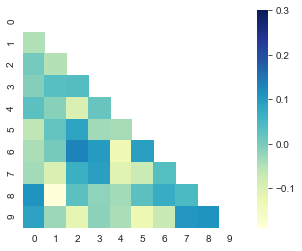

In [27]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,  cmap="YlGnBu")
    plt.show()

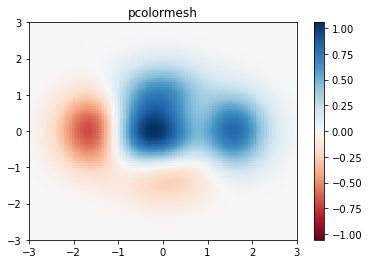

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

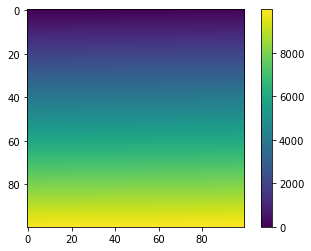

In [29]:
import matplotlib.pyplot as plt
import numpy as np


def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()


test_array = np.arange(100 * 100).reshape(100, 100)
heatmap2d(test_array)

In [30]:
trade_volume

(50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)